# Timing Experiment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings
import detect_simpsons_paradox as dsp
import data_util as sp_dat
import random
import time
import math
from random import gauss

Add extra parameter to method mixed_regression_sp for controling the number of extra attributes for continuous attributes and categorical attributes

In [2]:
def mixed_regression_sp(N, mu,cov,p,extra):
    
    k = len(mu)
    
    # sample from clusters
    z = np.random.randint(0,k,N)
    x = np.asarray([np.random.multivariate_normal(mu[z_i],cov) for z_i in z])

    # make a dataframe
    latent_df = pd.DataFrame(data=x,
                           columns = ['x1', 'x2'])
    
    # add extra continuous column
    for i in range(extra):
        attrName = "con_" + str(i)
        y = pd.DataFrame(data=np.random.normal(0, 100, N),columns=[attrName])
        latent_df = pd.concat([latent_df, y], axis=1)
        
    # code z as color and add that as a column to the dataframe
    color_z = {0:'r', 1:'b', 2:'g'}
    
    latent_df['color'] = [z_i for z_i in z]
    
    
    # add extra categorical column
    for i in range(extra):
        attrName = "cat_" + str(i)
        y = pd.DataFrame(data=np.random.choice(100,N),columns=[attrName])
        latent_df = pd.concat([latent_df, y], axis=1)
   
    return latent_df

In [3]:
from random import randint
def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)

In [4]:
def generateDataset(size, numClu, numExtra):
    """
    generate synthetic dataset for time experiments
    
    Parameters
    --------------
    size: 10 to the power of size
    numClu: number of clusters
    numberOfExtraColumn: number of extra categorical columns and continuous columns
    """
    
    # set the data size
    N = int(math.pow(10,size))

    # generate numClu mu_x and mu_y for sampling data from numClu clusters
    # create first two mu
    mu = np.asarray([[1,1],[5,5]])

    # generate rest of the mu
    for i in range(numClu - 2):
        mu_x = random_with_N_digits(2);
        variance = 1000
        mu_y = gauss(mu_x, math.sqrt(variance))
        mu_new = np.asarray([mu_x,mu_y])   
        mu = np.append(mu,[mu_new],axis=0)  

    cov = [[.6,-1],[0,.6]]
    
    # call mixed_regression_sp methods to generate the data set
    latent_df = mixed_regression_sp(N,mu,cov,[.7,.3], numExtra)
    
    return latent_df

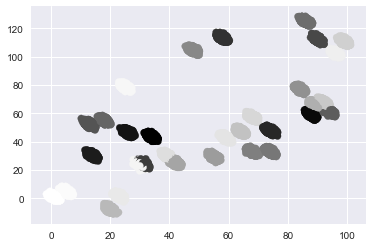

In [5]:
# call the generateDataset method to generate 10K, 32 clusters 
# and 5 extra continuous attributes and 5 extra categorical attributes
latent_df = generateDataset(5, 32, 5)

plt.scatter(latent_df['x1'], latent_df['x2'],
            c =  latent_df['color'], marker= 'o')
plt.show()

Time experiment for the whole dataset and the sampled dataset

In [6]:
# whole data set
start_time = time.time()
test = dsp.detect_simpsons_paradox(latent_df)
print("--- %s seconds ---" % (time.time() - start_time))

#10% sampled data set
rows1 = random.sample(list(latent_df.index), int(len(latent_df)*0.1))
latent_df1 = latent_df.loc[rows1]

start_time = time.time()
test1 = dsp.detect_simpsons_paradox(latent_df1)
print("10 Percent--- %s seconds ---" % (time.time() - start_time))

#30% sampled data set
rows3 = random.sample(list(latent_df.index), int(len(latent_df)*0.3))
latent_df3 = latent_df.loc[rows3]

start_time = time.time()
test3 = dsp.detect_simpsons_paradox(latent_df3)
print("30 Percent--- %s seconds ---" % (time.time() - start_time))

#50% sampled data set
rows5 = random.sample(list(latent_df.index), int(len(latent_df)*0.5))
latent_df5 = latent_df.loc[rows5]

start_time = time.time()
test5 = dsp.detect_simpsons_paradox(latent_df5)
print("50 Percent--- %s seconds ---" % (time.time() - start_time))

#60% sampled data set
rows6 = random.sample(list(latent_df.index), int(len(latent_df)*0.6))
latent_df6 = latent_df.loc[rows6]

start_time = time.time()
test6 = dsp.detect_simpsons_paradox(latent_df6)
print("60 Percent--- %s seconds ---" % (time.time() - start_time))

#90% sampled data set
rows9 = random.sample(list(latent_df.index), int(len(latent_df)*0.9))
latent_df9 = latent_df.loc[rows9]

start_time = time.time()
test9 = dsp.detect_simpsons_paradox(latent_df9)
print("90 Percent--- %s seconds ---" % (time.time() - start_time))

--- 3.631239175796509 seconds ---
10 Percent--- 3.8243939876556396 seconds ---
30 Percent--- 3.3809428215026855 seconds ---
50 Percent--- 3.424717903137207 seconds ---
60 Percent--- 3.443617105484009 seconds ---
90 Percent--- 4.2975242137908936 seconds ---
